In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sqlite3

In [2]:
#find available files in chosen directory
os.listdir('.')

['.ipynb_checkpoints',
 '2nd_level_tables.PNG',
 'dataset',
 'mlb.db',
 'schema-screenshot.png',
 'sqlite_db_creation_project.ipynb']

In [3]:
#navigate to dataset and create a list of files
files = [f for f in os.listdir('dataset')]
print(files)

['appearance_type.csv', 'game_log.csv', 'game_log_fields.txt', 'park_codes.csv', 'person_codes.csv', 'team_codes.csv']


In [4]:
#remove the txt file and isolate it
txt = files.pop(2)

#check results
print(txt,"\n",files)

game_log_fields.txt 
 ['appearance_type.csv', 'game_log.csv', 'park_codes.csv', 'person_codes.csv', 'team_codes.csv']


In [5]:
#store dataframes into a dictionary
data = {}

for file in files:
    df = pd.read_csv("dataset/{}".format(file))
    key = file.replace(".csv", "")
    data[key] = df

c:\users\niccolo.longoni\appdata\local\programs\python\python37-32\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (12,13,14,15,19,20,81,82,83,84,85,86,87,88,93,94,95,96,97,98,99,100,105,106,108,109,111,112,114,115,117,118,120,121,123,124,126,127,129,130,132,133,135,136,138,139,141,142,144,145,147,148,150,151,153,154,156,157,160) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
data.keys()

dict_keys(['appearance_type', 'game_log', 'park_codes', 'person_codes', 'team_codes'])

# Exploring the dataframes  

## Game Logs

In [7]:
pd.set_option('max_columns', 180)
pd.set_option('max_rows', 200000)
pd.set_option('max_colwidth', 5000)

In [8]:
def glossary():
    with open("dataset/{}".format(txt)) as glossary:
        r = glossary.read()
        print(r)
        
glossary()

Field(s)  Meaning
    1     Date in the form "yyyymmdd"
    2     Number of game:
             "0" -- a single game
             "1" -- the first game of a double (or triple) header
                    including seperate admission doubleheaders
             "2" -- the second game of a double (or triple) header
                    including seperate admission doubleheaders
             "3" -- the third game of a triple-header
             "A" -- the first game of a double-header involving 3 teams
             "B" -- the second game of a double-header involving 3 teams
    3     Day of week  ("Sun","Mon","Tue","Wed","Thu","Fri","Sat")
  4-5     Visiting team and league
    6     Visiting team game number
          For this and the home team game number, ties are counted as
          games and suspended games are counted from the starting
          rather than the ending date.
  7-8     Home team and league
    9     Home team game number
10-11     Visiting and home team score (unquoted)


In [9]:
print(data['game_log'].shape)
data['game_log'].head()

(171907, 161)


,date,number_of_game,day_of_week,v_name,v_league,v_game_number,h_name,h_league,h_game_number,v_score,h_score,length_outs,day_night,completion,forefeit,protest,park_id,attendance,length_minutes,v_line_score,h_line_score,v_at_bats,v_hits,v_doubles,v_triples,v_homeruns,v_rbi,v_sacrifice_hits,v_sacrifice_flies,v_hit_by_pitch,v_walks,v_intentional_walks,v_strikeouts,v_stolen_bases,v_caught_stealing,v_grounded_into_double,v_first_catcher_interference,v_left_on_base,v_pitchers_used,v_individual_earned_runs,v_team_earned_runs,v_wild_pitches,v_balks,v_putouts,v_assists,v_errors,v_passed_balls,v_double_plays,v_triple_plays,h_at_bats,h_hits,h_doubles,h_triples,h_homeruns,h_rbi,h_sacrifice_hits,h_sacrifice_flies,h_hit_by_pitch,h_walks,h_intentional_walks,h_strikeouts,h_stolen_bases,h_caught_stealing,h_grounded_into_double,h_first_catcher_interference,h_left_on_base,h_pitchers_used,h_individual_earned_runs,h_team_earned_runs,h_wild_pitches,h_balks,h_putouts,h_assists,h_errors,h_passed_balls,h_double_plays,h_triple_plays,hp_umpire_id,hp_umpire_name,1b_umpire_id,1b_umpire_name,2b_umpire_id,2b_umpire_name,3b_umpire_id,3b_umpire_name,lf_umpire_id,lf_umpire_name,rf_umpire_id,rf_umpire_name,v_manager_id,v_manager_name,h_manager_id,h_manager_name,winning_pitcher_id,winning_pitcher_name,losing_pitcher_id,losing_pitcher_name,saving_pitcher_id,saving_pitcher_name,winning_rbi_batter_id,winning_rbi_batter_id_name,v_starting_pitcher_id,v_starting_pitcher_name,h_starting_pitcher_id,h_starting_pitcher_name,v_player_1_id,v_player_1_name,v_player_1_def_pos,v_player_2_id,v_player_2_name,v_player_2_def_pos,v_player_3_id,v_player_3_name,v_player_3_def_pos,v_player_4_id,v_player_4_name,v_player_4_def_pos,v_player_5_id,v_player_5_name,v_player_5_def_pos,v_player_6_id,v_player_6_name,v_player_6_def_pos,v_player_7_id,v_player_7_name,v_player_7_def_pos,v_player_8_id,v_player_8_name,v_player_8_def_pos,v_player_9_id,v_player_9_name,v_player_9_def_pos,h_player_1_id,h_player_1_name,h_player_1_def_pos,h_player_2_id,h_player_2_name,h_player_2_def_pos,h_player_3_id,h_player_3_name,h_player_3_def_pos,h_player_4_id,h_player_4_name,h_player_4_def_pos,h_player_5_id,h_player_5_name,h_player_5_def_pos,h_player_6_id,h_player_6_name,h_player_6_def_pos,h_player_7_id,h_player_7_name,h_player_7_def_pos,h_player_8_id,h_player_8_name,h_player_8_def_pos,h_player_9_id,h_player_9_name,h_player_9_def_pos,additional_info,acquisition_info
0,18710504,0,Thu,CL1,NaN,1,FW1,NaN,1,0,2,54.0,D,NaN,NaN,NaN,FOR01,200.0,120.0,000000000,010010000,30.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,6.0,1.0,NaN,-1.0,NaN,4.0,1.0,1.0,1.0,0.0,0.0,27.0,9.0,0.0,3.0,0.0,0.0,31.0,4.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,NaN,-1.0,NaN,3.0,1.0,0.0,0.0,0.0,0.0,27.0,3.0,3.0,1.0,1.0,0.0,boakj901,John Boake,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,paboc101,Charlie Pabor,lennb101,Bill Lennon,mathb101,Bobby Mathews,prata101,Al Pratt,NaN,NaN,NaN,NaN,prata101,Al Pratt,mathb101,Bobby Mathews,whitd102,Deacon White,2.0,kimbg101,Gene Kimball,4.0,paboc101,Charlie Pabor,7.0,allia101,Art Allison,8.0,white104,Elmer White,9.0,prata101,Al Pratt,1.0,sutte101,Ezra Sutton,5.0,carlj102,Jim Carleton,3.0,bassj101,John Bass,6.0,selmf101,Frank Sellman,5.0,mathb101,Bobby Mathews,1.0,foraj101,Jim Foran,3.0,goldw101,Wally Goldsmith,6.0,lennb101,Bill Lennon,2.0,caret101,Tom Carey,4.0,mince101,Ed Mincher,7.0,mcdej101,James McDermott,8.0,kellb105,Bill Kelly,9.0,NaN,Y
1,18710505,0,Fri,BS1,NaN,1,WS3,NaN,1,20,18,54.0,D,NaN,NaN,NaN,WAS01,5000.0,145.0,107000435,640113030,41.0,13.0,1.0,2.0,0.0,13.0,0.0,0.0,0.0,18.0,NaN,5.0,3.0,NaN,-1.0,NaN,12.0,1.0,6.0,6.0,1.0,0.0,27.0,13.0,10.0,1.0,2.0,0.0,49.0,14.0,2.0,0.0,0.0,11.0,0.0,0.0,0.0,10.0,NaN,2.0,1.0,NaN,-1.0,NaN,14.0,1.0,7.0,7.0,0.0,0.0,27.0,20.0,10.0,2.0,3.0,0.0,dobsh901,Henry Dobson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wrigh101,Harry Wright,younn801,Nick Young,spala101,Al Spalding,braia102,Asa Brainard,NaN,NaN,NaN,NaN,spala101,Al Spalding,braia102,Asa Brainard,wrigg101,George Wright,6.0,barnr102,Ross

Each row is a game, and for each game we have an incredible amount of info:

- General information on the game (date, day of week, involved teams, results, etc.)
- Team level stats for each team (v = visitors, h = home)
- A list of players from each team, numbered, with their defensive positions (player_id, player_name, def_pos)
- miscellaneous

For all details it is best to refer to the glossary. Interestingly enough, there is **NO primary_key** to uniquely identify a game, but lots of ids we will probably be able to use as join keys towards other tables.

In [10]:
#take only columns with ids
ids = list(data['game_log'].columns[data['game_log'].columns.str.endswith('id')])
data['game_log'].loc[0:5,ids].head()

,park_id,hp_umpire_id,1b_umpire_id,2b_umpire_id,3b_umpire_id,lf_umpire_id,rf_umpire_id,v_manager_id,h_manager_id,winning_pitcher_id,losing_pitcher_id,saving_pitcher_id,winning_rbi_batter_id,v_starting_pitcher_id,h_starting_pitcher_id,v_player_1_id,v_player_2_id,v_player_3_id,v_player_4_id,v_player_5_id,v_player_6_id,v_player_7_id,v_player_8_id,v_player_9_id,h_player_1_id,h_player_2_id,h_player_3_id,h_player_4_id,h_player_5_id,h_player_6_id,h_player_7_id,h_player_8_id,h_player_9_id
0,FOR01,boakj901,NaN,NaN,NaN,NaN,NaN,paboc101,lennb101,mathb101,prata101,NaN,NaN,prata101,mathb101,whitd102,kimbg101,paboc101,allia101,white104,prata101,sutte101,carlj102,bassj101,selmf101,mathb101,foraj101,goldw101,lennb101,caret101,mince101,mcdej101,kellb105
1,WAS01,dobsh901,NaN,NaN,NaN,NaN,NaN,wrigh101,younn801,spala101,braia102,NaN,NaN,spala101,braia102,wrigg101,barnr102,birdd102,mcvec101,wrigh101,goulc101,schah101,conef101,spala101,watef102,forcd101,mille105,allid101,hallg101,leona101,braia102,burrh101,berth101
2,RCK01,mawnj901,NaN,NaN,NaN,NaN,NaN,paboc101,hasts101,prata101,fishc102,NaN,NaN,prata101,fishc102,whitd102,kimbg101,paboc101,allia101,white104,prata101,sutte101,carlj102,bassj101,mackd101,addyb101,fishc102,hasts101,ham-r101,ansoc101,sagep101,birdg101,stirg101
3,CHI01,willg901,NaN,NaN,NaN,NaN,NaN,paboc101,woodj106,zettg101,prata101,NaN,NaN,prata101,zettg101,whitd102,kimbg101,paboc101,allia101,white104,prata101,sutte101,carlj102,bassj101,mcatb101,kingm101,hodec101,woodj106,simmj101,folet101,duffe101,pinke101,zettg101
4,TRO01,leroi901,NaN,NaN,NaN,NaN,NaN,wrigh101,pikel101,spala101,mcmuj101,NaN,NaN,spala101,mcmuj101,wrigg101,barnr102,birdd102,mcvec101,wrigh101,goulc101,schah101,conef101,spala101,flync101,mcgem101,yorkt101,mcmuj101,kings101,beave101,bells101,pikel101,cravb101


An extra word of notice should be spent for the distribution across leagues.
It looks like the large majority of the recorded games stick to the **NL** and **AL** leagues.

In [11]:
leagues = data['game_log']['h_league'].value_counts()
leagues

NL    88867
AL    74712
AA     5039
FL     1243
PL      532
UA      428
Name: h_league, dtype: int64

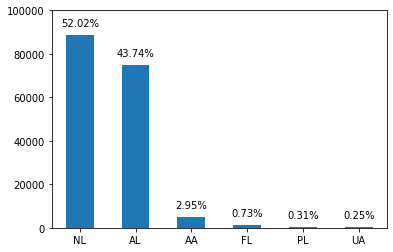

In [12]:
leagues = data['game_log']['h_league'].value_counts()
percentages = data['game_log']['h_league'].value_counts(normalize = True)
#prepare labels mapping the series to %, and bring them into array form
labels = percentages.map("{:.2%}".format).values


#define plot and apply rotation of xticks
leagues.plot.bar(ylim = (0,100000))
plt.xticks(rotation="horizontal")

for i in enumerate(leagues):
    x_value = i[0]          #take the first value of the enumerate tuple (x), which works as a positional index
    y_value = i[1]          #take the second value of the enumerate tuple (y)
    lab = labels[i[0]]
    plt.annotate(lab, xy = (x_value, y_value+4000), ha='center')

## Appearance_type

In [13]:
print(data['appearance_type'].shape)
data['appearance_type'].head(10)

(31, 3)


,appearance_type_id,name,category
0,O1,Batter 1,offense
1,O2,Batter 2,offense
2,O3,Batter 3,offense
3,O4,Batter 4,offense
4,O5,Batter 5,offense
5,O6,Batter 6,offense
6,O7,Batter 7,offense
7,O8,Batter 8,offense
8,O9,Batter 9,offense
9,D1,Pitcher,defense


A short dataframe tha seem to provide a dictionary of positions for a variety of fields, that is:  
- defense  
- offense  
- umpires  
This are likely to be used as suffixes to player_ids, etc.

## Players

In [14]:
print(data['person_codes'].shape)
data['person_codes'].head()
#head(5)

(20494, 7)


,id,last,first,player_debut,mgr_debut,coach_debut,ump_debut
0,aardd001,Aardsma,David,04/06/2004,NaN,NaN,NaN
1,aaroh101,Aaron,Hank,04/13/1954,NaN,NaN,NaN
2,aarot101,Aaron,Tommie,04/10/1962,NaN,04/06/1979,NaN
3,aased001,Aase,Don,07/26/1977,NaN,NaN,NaN
4,abada001,Abad,Andy,09/10/2001,NaN,NaN,NaN


This seems to be a list of people with IDs. The IDs do match up with those used in the game log, hence:
**players.id = game_log.player_id**

In [15]:
data['person_codes'][data['person_codes']['id'] == 'prata101']


,id,last,first,player_debut,mgr_debut,coach_debut,ump_debut
14841,prata101,Pratt,Al,05/04/1871,05/02/1882,NaN,05/20/1879


There are debut dates, for players, managers, coaches and umpires.  
We can see that some people might have been one or more of these roles - this explains why we have multiple columns for each record. The large majority of which though is populated by NaNs.



## Teams

In [16]:
print(data['team_codes'].shape)
data['team_codes'].head()

(150, 8)


,team_id,league,start,end,city,nickname,franch_id,seq
0,ALT,UA,1884,1884,Altoona,Mountain Cities,ALT,1
1,ARI,NL,1998,0,Arizona,Diamondbacks,ARI,1
2,BFN,NL,1879,1885,Buffalo,Bisons,BFN,1
3,BFP,PL,1890,1890,Buffalo,Bisons,BFP,1
4,BL1,NaN,1872,1874,Baltimore,Canaries,BL1,1


team_id here is matching some dimensions in log, but are called v_team_name and h_team_name. To be remembered for regerence in designing the db schema.

## Park Codes
Pretty self explanatory, they match park_ids in the game_log file.

In [17]:
print(data['park_codes'].shape)
data['park_codes'].head(5)

(252, 9)


,park_id,name,aka,city,state,start,end,league,notes
0,ALB01,Riverside Park,NaN,Albany,NY,09/11/1880,05/30/1882,NL,TRN:9/11/80;6/15&9/10/1881;5/16-5/18&5/30/1882
1,ALT01,Columbia Park,NaN,Altoona,PA,04/30/1884,05/31/1884,UA,NaN
2,ANA01,Angel Stadium of Anaheim,Edison Field; Anaheim Stadium,Anaheim,CA,04/19/1966,NaN,AL,NaN
3,ARL01,Arlington Stadium,NaN,Arlington,TX,04/21/1972,10/03/1993,AL,NaN
4,ARL02,Rangers Ballpark in Arlington,The Ballpark in Arlington; Ameriquest Fl,Arlington,TX,04/11/1994,NaN,AL,NaN


# Setting up the database
Exploring the Retrosheet site, we can find a data dictionary that includes the following definition:

_id: Each game begins with a twelve character ID record which identifies the date, home team, and number of the game. For example, ATL198304080 should be read as follows. The first three characters identify the home team (the Braves). The next four are the year (1983). The next two are the month (April) using the standard numeric notation, 04, followed by the day (08). The last digit indicates if this is a single game (0), first game (1) or second game (2) if more than one game is played during a day, usually a double header. 
The id record starts the description of a game thus ending the description of the preceding game in the file._

This will give us a hand in creating a unique primary key to identify the games.



In [18]:
db = 'mlb.db' #define the database


#define helper functions: run_Command to execute CRUD statements on the db, and run_query to explore it.
def run_command(c):
    with sqlite3.connect(db) as conn:
        conn.isolation_level = None #autocommit mode
        conn.execute(c)             #execute a sql statement - we'll use command to create and insert rows into the tables

def run_query(q):
    with sqlite3.connect(db) as conn:
        return pd.read_sql(q, conn)
    
def show_tables():
    q = '''SELECT name, type
    FROM sqlite_master
    WHERE type IN ("table","view")
    '''
    return run_query(q)

In [19]:
table_names = list(data.keys())
print(table_names)

['appearance_type', 'game_log', 'park_codes', 'person_codes', 'team_codes']


In [20]:
#proofcheck cell for debugging


with sqlite3.connect(db) as conn:
    for tables in ['park','person','league','team','game','team_appearance']:
        conn.execute('DROP TABLE IF EXISTS {};'.format(tables))

In [21]:
show_tables()

,name,type
0,appearance_type,table
1,person_appearance,table


In [22]:
#create tables
with sqlite3.connect(db) as conn:     #instantiate a connection
    
    for table_name in table_names:    #for each table you wish to create...
        df = data[table_name]         #prepare a dataframe to be pushed into a sql table via the following method 
        df.to_sql(table_name, 
                  conn, 
                  if_exists = 'replace',   #if_exists covers any issues and recovers first state of the db
                  index = False) 
        
""" 
We could have also used a statement such as the folowing one:
conn.execute('DROP TABLE IF EXISTS {}'.format(table_name))
"""

show_tables() #verify the tables have been created

,name,type
0,person_appearance,table
1,appearance_type,table
2,game_log,table
3,park_codes,table
4,person_codes,table
5,team_codes,table


Next step is to integrate the command to add the compound key. We will do it in 2 steps:
1. Add a column to the game_log table by using the **ALTER TABLE** statement  
2. **SET** all the values with a combination of the selected fields that generate the game_id key
3. Verify results by querying the table

In [23]:
# 1. Add column to the table
command = """
ALTER TABLE game_log
ADD COLUMN game_id 
"""

try:
    run_command(command)
except:                      #how do I use an improved version that gives me a warning but still executes the code?
    print("An Error was ignored: the table already has the game_id column")
    pass

run_query("""SELECT * FROM game_log LIMIT 1""")

,date,number_of_game,day_of_week,v_name,v_league,v_game_number,h_name,h_league,h_game_number,v_score,h_score,length_outs,day_night,completion,forefeit,protest,park_id,attendance,length_minutes,v_line_score,h_line_score,v_at_bats,v_hits,v_doubles,v_triples,v_homeruns,v_rbi,v_sacrifice_hits,v_sacrifice_flies,v_hit_by_pitch,v_walks,v_intentional_walks,v_strikeouts,v_stolen_bases,v_caught_stealing,v_grounded_into_double,v_first_catcher_interference,v_left_on_base,v_pitchers_used,v_individual_earned_runs,v_team_earned_runs,v_wild_pitches,v_balks,v_putouts,v_assists,v_errors,v_passed_balls,v_double_plays,v_triple_plays,h_at_bats,h_hits,h_doubles,h_triples,h_homeruns,h_rbi,h_sacrifice_hits,h_sacrifice_flies,h_hit_by_pitch,h_walks,h_intentional_walks,h_strikeouts,h_stolen_bases,h_caught_stealing,h_grounded_into_double,h_first_catcher_interference,h_left_on_base,h_pitchers_used,h_individual_earned_runs,h_team_earned_runs,h_wild_pitches,h_balks,h_putouts,h_assists,h_errors,h_passed_balls,h_double_plays,h_triple_plays,hp_umpire_id,hp_umpire_name,1b_umpire_id,1b_umpire_name,2b_umpire_id,2b_umpire_name,3b_umpire_id,3b_umpire_name,lf_umpire_id,lf_umpire_name,rf_umpire_id,rf_umpire_name,v_manager_id,v_manager_name,h_manager_id,h_manager_name,winning_pitcher_id,winning_pitcher_name,losing_pitcher_id,losing_pitcher_name,saving_pitcher_id,saving_pitcher_name,winning_rbi_batter_id,winning_rbi_batter_id_name,v_starting_pitcher_id,v_starting_pitcher_name,h_starting_pitcher_id,h_starting_pitcher_name,v_player_1_id,v_player_1_name,v_player_1_def_pos,v_player_2_id,v_player_2_name,v_player_2_def_pos,v_player_3_id,v_player_3_name,v_player_3_def_pos,v_player_4_id,v_player_4_name,v_player_4_def_pos,v_player_5_id,v_player_5_name,v_player_5_def_pos,v_player_6_id,v_player_6_name,v_player_6_def_pos,v_player_7_id,v_player_7_name,v_player_7_def_pos,v_player_8_id,v_player_8_name,v_player_8_def_pos,v_player_9_id,v_player_9_name,v_player_9_def_pos,h_player_1_id,h_player_1_name,h_player_1_def_pos,h_player_2_id,h_player_2_name,h_player_2_def_pos,h_player_3_id,h_player_3_name,h_player_3_def_pos,h_player_4_id,h_player_4_name,h_player_4_def_pos,h_player_5_id,h_player_5_name,h_player_5_def_pos,h_player_6_id,h_player_6_name,h_player_6_def_pos,h_player_7_id,h_player_7_name,h_player_7_def_pos,h_player_8_id,h_player_8_name,h_player_8_def_pos,h_player_9_id,h_player_9_name,h_player_9_def_pos,additional_info,acquisition_info,game_id
0,18710504,0,Thu,CL1,None,1,FW1,None,1,0,2,54.0,D,None,None,None,FOR01,200.0,120.0,000000000,010010000,30.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,None,6.0,1.0,None,-1.0,None,4.0,1.0,1.0,1.0,0.0,0.0,27.0,9.0,0.0,3.0,0.0,0.0,31.0,4.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,None,0.0,0.0,None,-1.0,None,3.0,1.0,0.0,0.0,0.0,0.0,27.0,3.0,3.0,1.0,1.0,0.0,boakj901,John Boake,None,None,None,None,None,None,None,None,None,None,paboc101,Charlie Pabor,lennb101,Bill Lennon,mathb101,Bobby Mathews,prata101,Al Pratt,None,None,None,None,prata101,Al Pratt,mathb101,Bobby Mathews,whitd102,Deacon White,2.0,kimbg101,Gene Kimball,4.0,paboc101,Charlie Pabor,7.0,allia101,Art Allison,8.0,white104,Elmer White,9.0,prata101,Al Pratt,1.0,sutte101,Ezra Sutton,5.0,carlj102,Jim Carleton,3.0,bassj101,John Bass,6.0,selmf101,Frank Sellman,5.0,mathb101,Bobby Mathews,1.0,foraj101,Jim Foran,3.0,goldw101,Wally Goldsmith,6.0,lennb101,Bill Lennon,2.0,caret101,Tom Carey,4.0,mince101,Ed Mincher,7.0,mcdej101,James McDermott,8.0,kellb105,Bill Kelly,9.0,None,Y,None


In [24]:
#2. define command to update new column with given combination
c = """
UPDATE game_log
    SET game_id = date || h_name || number_of_game 
    WHERE game_id IS NULL /*preventing from reassignment if command is executed multiple times*/
;
"""

#        WHERE h_name IS NOT NULL
 #       AND date IS NOT NULL
  #      AND number_of_game IS NOT NULL


run_command(c)


#show results
run_query(
    """SELECT game_id, h_name, date, number_of_game
    FROM game_log
    LIMIT 5""")

,game_id,h_name,date,number_of_game
0,18710504FW10,FW1,18710504,0
1,18710505WS30,WS3,18710505,0
2,18710506RC10,RC1,18710506,0
3,18710508CH10,CH1,18710508,0
4,18710509TRO0,TRO,18710509,0


In [25]:
run_query("""SELECT MAX(game_id) FROM game_log""")

,MAX(game_id)
0,20161002WAS0


# Options for normalization
Concept of normalization is based on two simple concepts:
- Avoid repetition of information
- Making sure that non-primary-columns are attributes of the primary keys
- Kill off redundant data (e.g. info on parks can be retrieved both from the park db and the columns in the game_log db.

A good example of what can be normalized is the list of columns addressing the players involved per team in each game.  
This is a list of **9 ids, names, positions** x 2 teams --> 54 columns that can have their own player db.

In [26]:
#show results
run_query(
    """SELECT *
    FROM person_codes
    LIMIT 5""")

,id,last,first,player_debut,mgr_debut,coach_debut,ump_debut
0,aardd001,Aardsma,David,04/06/2004,None,None,None
1,aaroh101,Aaron,Hank,04/13/1954,None,None,None
2,aarot101,Aaron,Tommie,04/10/1962,None,04/06/1979,None
3,aased001,Aase,Don,07/26/1977,None,None,None
4,abada001,Abad,Andy,09/10/2001,None,None,None


In [27]:
data["game_log"].columns[data["game_log"].columns.str.contains("player")]

Index(['v_player_1_id', 'v_player_1_name', 'v_player_1_def_pos',
       'v_player_2_id', 'v_player_2_name', 'v_player_2_def_pos',
       'v_player_3_id', 'v_player_3_name', 'v_player_3_def_pos',
       'v_player_4_id', 'v_player_4_name', 'v_player_4_def_pos',
       'v_player_5_id', 'v_player_5_name', 'v_player_5_def_pos',
       'v_player_6_id', 'v_player_6_name', 'v_player_6_def_pos',
       'v_player_7_id', 'v_player_7_name', 'v_player_7_def_pos',
       'v_player_8_id', 'v_player_8_name', 'v_player_8_def_pos',
       'v_player_9_id', 'v_player_9_name', 'v_player_9_def_pos',
       'h_player_1_id', 'h_player_1_name', 'h_player_1_def_pos',
       'h_player_2_id', 'h_player_2_name', 'h_player_2_def_pos',
       'h_player_3_id', 'h_player_3_name', 'h_player_3_def_pos',
       'h_player_4_id', 'h_player_4_name', 'h_player_4_def_pos',
       'h_player_5_id', 'h_player_5_name', 'h_player_5_def_pos',
       'h_player_6_id', 'h_player_6_name', 'h_player_6_def_pos',
       'h_player_7_id', '

In [28]:
show_tables()

,name,type
0,person_appearance,table
1,appearance_type,table
2,game_log,table
3,park_codes,table
4,person_codes,table
5,team_codes,table


In [29]:
run_query('''SELECT DISTINCT seq FROM team_codes limit 10''')

,seq
0,1
1,2
2,3
3,4


A good potential solution of how we can condense information is referred in the graph below:
- From the initial 5 tables we **scaled up to 8**  

  
- The game_log table has been dismembered keeping some of its information in the  `game` table, identified by its primary key game_id, and moving another round into the `team_appearance` table. It is an interesting choice in the way that table will provide us information on **each** team, per **each** game. This results in having two primary keys: every game has, after all, two teams competing.  

  
- The `team` table has remained relatively straightforward: we just removed the start, end and seq columns: that info can be retrieved as well from the game table (min/max). A better solution might have been to leave the info there: while slightly redundant, it was indeed easier to retrieve that info as an attribute of teams, rather than inferring it from games.  


- One last note shall be made on how invididual players have been approached: we have split information of a person in a waterfall-like way, from the individual (`person` table) to when they appeared (`person_appearance`)  and their role (`appearance_type`). A dedicated table to `appearance_type` allows us to avoid multiple redundancies in the other tables (all individuals are either players, umpires, coaches or managers).



![Alt text](schema-screenshot.png)


# Creating the tables
Let's crack on with creating tales. An important consideration to do here is that we MUST create first tables with no relationship for foreign keys, otherwise there is no way we can build the interactions between said tables. In another sense, we can create the innermost tables and then go up in granularity.
In light of this, we can safely create:
- `park` table (the `game` table will pick the park_id from here)
- `person` table
- `appearance_type` (the `person_appearance` table will pick the id from here)
- `league` table



In [30]:
show_tables()

,name,type
0,person_appearance,table
1,appearance_type,table
2,game_log,table
3,park_codes,table
4,person_codes,table
5,team_codes,table


In [31]:
run_query('''SELECT * FROM appearance_type LIMIT 5''')

,appearance_type_id,name,category
0,O1,Batter 1,offense
1,O2,Batter 2,offense
2,O3,Batter 3,offense
3,O4,Batter 4,offense
4,O5,Batter 5,offense


### PARK - Create and Insert statements  [Standard SELECT statement]

In [32]:
create_park = '''
CREATE TABLE IF NOT EXISTS park (
    park_id TEXT PRIMARY KEY,
    name TEXT,
    nickname TEXT,
    city TEXT,
    state TEXT,
    notes TEXT)
    ;
'''

insert_park = '''
INSERT OR IGNORE INTO park
SELECT
    park_id,
    name,
    aka,
    city,
    state,
    notes
FROM
    park_codes;
'''

q = '''
SELECT * 
FROM park
LIMIT 5;
'''

run_command(create_park)
run_command(insert_park)
run_query(q)

,park_id,name,nickname,city,state,notes
0,ALB01,Riverside Park,None,Albany,NY,TRN:9/11/80;6/15&9/10/1881;5/16-5/18&5/30/1882
1,ALT01,Columbia Park,None,Altoona,PA,None
2,ANA01,Angel Stadium of Anaheim,Edison Field; Anaheim Stadium,Anaheim,CA,None
3,ARL01,Arlington Stadium,None,Arlington,TX,None
4,ARL02,Rangers Ballpark in Arlington,The Ballpark in Arlington; Ameriquest Fl,Arlington,TX,None


### PERSON - Create and Insert statements 


In [33]:
create_person = '''
CREATE TABLE IF NOT EXISTS person (
    person_id TEXT PRIMARY KEY,
    first_name TEXT,
    second_name TEXT
    );
'''

insert_person = '''
INSERT OR IGNORE INTO person
SELECT id,
    first,
    last
FROM 
    person_codes;
    '''

run_command(create_person)
run_command(insert_person)
run_query('''SELECT * FROM person LIMIT 5''')

,person_id,first_name,second_name
0,aardd001,David,Aardsma
1,aaroh101,Hank,Aaron
2,aarot101,Tommie,Aaron
3,aased001,Don,Aase
4,abada001,Andy,Abad


### APPEARANCE_TYPE - Create and Insert statements [RECREATE TABLE WITH PRIMARY_KEY]
By looking at the two tables we wonder why it's worth for us to create a new table. After all the columns we have chosen to keep are exactly the same. The trick here tough stays in the fact that we lack a primary key after we have ported the dataframe to sqlite3. We can see it with the PRAGMA TABLE_INFO command.


In [34]:
run_query('''PRAGMA TABLE_INFO(appearance_type)''')

,cid,name,type,notnull,dflt_value,pk
0,0,appearance_type_id,TEXT,0,None,0
1,1,name,TEXT,0,None,0
2,2,category,TEXT,0,None,0


Hence, we'll need first to DROP the table and then to recreate it from scratch.

In [35]:
drop_table = '''
DROP TABLE IF EXISTS appearance_type
'''
run_command(drop_table)



create_appearance = '''
CREATE TABLE appearance_type (
    appearance_type_id TEXT PRIMARY KEY,
    name TEXT,
    category TEXT
    )
'''
run_command(create_appearance)


run_query('''PRAGMA TABLE_INFO(appearance_type)''')


,cid,name,type,notnull,dflt_value,pk
0,0,appearance_type_id,TEXT,0,None,1
1,1,name,TEXT,0,None,0
2,2,category,TEXT,0,None,0


Having dropped the table, we cannot insert data from its 'previous' counterpart, but need to use the .to_sql method from the initial dataframe. So we are going from csv to db, in a certain sense.

In [36]:
#now insert the values from the previous dataframe
with sqlite3.connect(db) as conn:
    data["appearance_type"].to_sql('appearance_type',
                           conn,
                           index=False,
                           if_exists='append')
    
q = '''SELECT * FROM appearance_type LIMIT 5''' 

run_query(q)

,appearance_type_id,name,category
0,O1,Batter 1,offense
1,O2,Batter 2,offense
2,O3,Batter 3,offense
3,O4,Batter 4,offense
4,O5,Batter 5,offense


### LEAGUE - Create and Insert statements [MANUAL DATA INSERTION]
In this specific case we'll insert values manually because this table will act as a dictionary for the various league codes.

In [37]:
show_tables()

,name,type
0,person_appearance,table
1,game_log,table
2,park_codes,table
3,person_codes,table
4,team_codes,table
5,park,table
6,person,table
7,appearance_type,table


In [38]:
create_league = '''
CREATE TABLE IF NOT EXISTS league (
league_id TEXT PRIMARY KEY,
name TEXT)'''


insert_league = '''
INSERT OR IGNORE INTO league
VALUES
    ("NL", "National League"),
    ("AL", "American League"),
    ("AA", "American Association"),
    ("FL", "Federal League"),
    ("PL", "Players League"),
    ("UA", "Union Association")
;
'''

run_command(create_league)
run_command(insert_league)
run_query('''SELECT * FROM league''')

,league_id,name
0,NL,National League
1,AL,American League
2,AA,American Association
3,FL,Federal League
4,PL,Players League
5,UA,Union Association


The next step is to work on the two tables that have foreign keys in the four tables created above. This will allow us to have existing, ongoing relationships. Below a re table structure we aim for.cap of the existing table 
Let's create then thos two tables - `game` and `team`.  
Some normalization references can be highlighted, such as:
- All columns referring to one of the two teams have been removed thus making the `game` table much more manageable compared to the existing game_log file.
- The `day` field works as a boolean (1 for day 0 for night)
- Other info that can be retrieed from those tables has been removed (e.g. `day_of_week`)

It is a rigid approach for which analysts wouldn't be very thankful, but it would help us keeping things as light as possible.


![Alt text](2nd_level_tables.png)


## TEAM table - Create and Insert statements

In [39]:
create_team = '''
CREATE TABLE IF NOT EXISTS team (
    team_id TEXT PRIMARY KEY,
    league_id TEXT,
    city TEXT,
    nickname TEXT,
    franch_id TEXT,
    FOREIGN KEY (league_id) REFERENCES league(league_id)
);''' #note syntax on foreign keys that is kept at the end of the statement

insert_team = '''
INSERT OR IGNORE INTO team
    SELECT
    team_id,
    league,
    city,
    nickname,
    franch_id
    FROM team_codes;
'''

run_command(create_team)
run_command(insert_team)
run_query('SELECT * FROM team LIMIT 10')

,team_id,league_id,city,nickname,franch_id
0,ALT,UA,Altoona,Mountain Cities,ALT
1,ARI,NL,Arizona,Diamondbacks,ARI
2,BFN,NL,Buffalo,Bisons,BFN
3,BFP,PL,Buffalo,Bisons,BFP
4,BL1,None,Baltimore,Canaries,BL1
5,BL2,AA,Baltimore,Orioles,BL2
6,BLN,NL,Baltimore,Orioles,BL2
7,BL4,None,Baltimore,Marylands,BL4
8,BLA,AL,Baltimore,Orioles,BLA
9,NYA,AL,New York,Yankees,BLA


## GAME table - Create and Insert statements


In [40]:
create_game = '''
CREATE TABLE IF NOT EXISTS game (
    game_id TEXT PRIMARY KEY,
    date TEXT,
    number_of_game INTEGER,
    park_id TEXT,
    length_outs INTEGER,
    day BOOLEAN,
    completion TEXT,
    forfeit TEXT,
    protest TEXT,
    attendance INTEGER,
    length_minutes INTEGER,
    additional_info TEXT,
    acquisition_info TEXT,
    FOREIGN KEY (park_id) REFERENCES park(park_id)
);
'''

insert_game = '''
INSERT OR IGNORE INTO game
SELECT
    game_id,
    date,
    number_of_game,
    park_id,
    length_outs,
    CASE 
        WHEN day_night = 'D' THEN 1
        WHEN day_night = 'N' THEN 0
        ELSE NULL
    END AS day,
    completion,
    forefeit,
    protest,
    attendance,
    length_minutes,
    additional_info,
    acquisition_info
FROM game_log;
'''

run_command(create_game)
run_command(insert_game)
run_query('SELECT * FROM game LIMIT 5')

,game_id,date,number_of_game,park_id,length_outs,day,completion,forfeit,protest,attendance,length_minutes,additional_info,acquisition_info
0,18710504FW10,18710504,0,FOR01,54,1,None,None,None,200,120,None,Y
1,18710505WS30,18710505,0,WAS01,54,1,None,None,None,5000,145,HTBF,Y
2,18710506RC10,18710506,0,RCK01,54,1,None,None,None,1000,140,None,Y
3,18710508CH10,18710508,0,CHI01,54,1,None,None,None,5000,150,None,Y
4,18710509TRO0,18710509,0,TRO01,54,1,None,None,None,3250,145,HTBF,Y


In [41]:
run_query('''SELECT MAX(game_id) FROM game''')

,MAX(game_id)
0,20161002WAS0


## TEAM_APPEARANCE table - Create and Insert statements  
Table creation is going to be ok and not very different from the previous instances. Only the double primary key is a little different, and shall be inserted at the end of the whole statement.

In [42]:
create_team_appearance = '''
CREATE TABLE IF NOT EXISTS team_appearance (
    team_id TEXT,
    game_id TEXT,
    home BOOLEAN,
    league_id TEXT,
    score INTEGER,
    line_score TEXT,
    at_bats INTEGER,
    hits INTEGER,
    doubles INTEGER,
    triples INTEGER,
    homeruns INTEGER,
    rbi INTEGER,
    sacrifice_hits INTEGER,
    sacrifice_flies INTEGER,
    hit_by_pitch INTEGER,
    walks INTEGER,
    intentional_walks INTEGER,
    strikeouts INTEGER,
    stolen_bases INTEGER,
    caught_stealing INTEGER,
    grounded_into_double INTEGER,
    first_catcher_interference INTEGER,
    left_on_base INTEGER,
    pitchers_used INTEGER,
    individual_earned_runs INTEGER,
    team_earned_runs INTEGER,
    wild_pitches INTEGER,
    balks INTEGER,
    putouts INTEGER,
    assists INTEGER,
    errors INTEGER,
    passed_balls INTEGER,
    double_plays INTEGER,
    triple_plays INTEGER,
    PRIMARY KEY (team_id, game_id),
    FOREIGN KEY (team_id) REFERENCES team(team_id),
    FOREIGN KEY (game_id) REFERENCES game(game_id),
    FOREIGN KEY (league_id) REFERENCES league(league_id)
    );
'''

run_command(create_team_appearance)

run_query('PRAGMA TABLE_INFO (team_appearance)')

,cid,name,type,notnull,dflt_value,pk
0,0,team_id,TEXT,0,None,1
1,1,game_id,TEXT,0,None,2
2,2,home,BOOLEAN,0,None,0
3,3,league_id,TEXT,0,None,0
4,4,score,INTEGER,0,None,0
5,5,line_score,TEXT,0,None,0
6,6,at_bats,INTEGER,0,None,0
7,7,hits,INTEGER,0,None,0
8,8,doubles,INTEGER,0,None,0
9,9,triples,INTEGER,0,None,0


The table is ready and must now be populated. There is are two important considerations to do here:
- We have a TON of columns to put together. Also, since we're talking about team_appearance, each match will have 2 entries, for the home team (all columns starting with h_).  
This will require us to process first all rows for the home team, and then UNION them to the visiting team (starting with v_).
- Another approach would be to query the starting dataframe and send data to the db with to_sql method.
- We also have the chance to do some string formatting to build the query string according to our needs.

In [43]:
run_query('''SELECT sql from sqlite_master WHERE name = "game_log"''')

sql
0  CREATE TABLE "game_log" (\n"date" INTEGER,\n  "number_of_game" INTEGER,\n  "day_of_week" TEXT,\n  "v_name" TEXT,\n  "v_league" TEXT,\n  "v_game_number" INTEGER,\n  "h_name" TEXT,\n  "h_league" TEXT,\n  "h_game_number" INTEGER,\n  "v_score" INTEGER,\n  "h_score" INTEGER,\n  "length_outs" REAL,\n  "day_night" TEXT,\n  "completion" TEXT,\n  "forefeit" TEXT,\n  "protest" TEXT,\n  "park_id" TEXT,\n  "attendance" REAL,\n  "length_minutes" REAL,\n  "v_line_score" TEXT,\n  "h_line_score" TEXT,\n  "v_at_bats" REAL,\n  "v_hits" REAL,\n  "v_doubles" REAL,\n  "v_triples" REAL,\n  "v_homeruns" REAL,\n  "v_rbi" REAL,\n  "v_sacrifice_hits" REAL,\n  "v_sacrifice_flies" REAL,\n  "v_hit_by_pitch" REAL,\n  "v_walks" REAL,\n  "v_intentional_walks" REAL,\n  "v_strikeouts" REAL,\n  "v_stolen_bases" REAL,\n  "v_caught_stealing" REAL,\n  "v_grounded_into_double" REAL,\n  "v_first_catcher_interference" REAL,\n  "v_left_on_base" REAL,\n  "v_pitchers_used" REAL,\n  "v_individual_earned_runs" REAL,\n  "v_team_earned_runs" REAL,\n  "v_wild_pitches" REAL,\n  "v_balks" REAL,\n  "v_putouts" REAL,\n  "v_assists" REAL,\n  "v_errors" REAL,\n  "v_passed_balls" REAL,\n  "v_double_plays" REAL,\n  "v_triple_plays" REAL,\n  "h_at_bats" REAL,\n  "h_hits" REAL,\n  "h_doubles" REAL,\n  "h_triples" REAL,\n  "h_homeruns" REAL,\n  "h_rbi" REAL,\n  "h_sacrifice_hits" REAL,\n  "h_sacrifice_flies" REAL,\n  "h_hit_by_pitch" REAL,\n  "h_walks" REAL,\n  "h_intentional_walks" REAL,\n  "h_strikeouts" REAL,\n  "h_stolen_bases" REAL,\n  "h_caught_stealing" REAL,\n  "h_grounded_into_double" REAL,\n  "h_first_catcher_interference" REAL,\n  "h_left_on_base" REAL,\n  "h_pitchers_used" REAL,\n  "h_individual_earned_runs" REAL,\n  "h_team_earned_runs" REAL,\n  "h_wild_pitches" REAL,\n  "h_balks" REAL,\n  "h_putouts" REAL,\n  "h_assists" REAL,\n  "h_errors" REAL,\n  "h_passed_balls" REAL,\n  "h_double_plays" REAL,\n  "h_triple_plays" REAL,\n  "hp_umpire_id" TEXT,\n  "hp_umpire_name" TEXT,\n  "1b_umpire_id" TEXT,\n  "1b_umpire_name" TEXT,\n  "2b_umpire_id" TEXT,\n  "2b_umpire_name" TEXT,\n  "3b_umpire_id" TEXT,\n  "3b_umpire_name" TEXT,\n  "lf_umpire_id" TEXT,\n  "lf_umpire_name" TEXT,\n  "rf_umpire_id" TEXT,\n  "rf_umpire_name" TEXT,\n  "v_manager_id" TEXT,\n  "v_manager_name" TEXT,\n  "h_manager_id" TEXT,\n  "h_manager_name" TEXT,\n  "winning_pitcher_id" TEXT,\n  "winning_pitcher_name" TEXT,\n  "losing_pitcher_id" TEXT,\n  "losing_pitcher_name" TEXT,\n  "saving_pitcher_id" TEXT,\n  "saving_pitcher_name" TEXT,\n  "winning_rbi_batter_id" TEXT,\n  "winning_rbi_batter_id_name" TEXT,\n  "v_starting_pitcher_id" TEXT,\n  "v_starting_pitcher_name" TEXT,\n  "h_starting_pitcher_id" TEXT,\n  "h_starting_pitcher_name" TEXT,\n  "v_player_1_id" TEXT,\n  "v_player_1_name" TEXT,\n  "v_player_1_def_pos" REAL,\n  "v_player_2_id" TEXT,\n  "v_player_2_name" TEXT,\n  "v_player_2_def_pos" REAL,\n  "v_player_3_id" TEXT,\n  "v_player_3_name" TEXT,\n  "v_player_3_def_pos" REAL,\n  "v_player_4_id" TEXT,\n  "v_player_4_name" TEXT,\n  "v_player_4_def_pos" REAL,\n  "v_player_5_id" TEXT,\n  "v_player_5_name" TEXT,\n  "v_player_5_def_pos" REAL,\n  "v_player_6_id" TEXT,\n  "v_player_6_name" TEXT,\n  "v_player_6_def_pos" REAL,\n  "v_player_7_id" TEXT,\n  "v_player_7_name" TEXT,\n  "v_player_7_def_pos" REAL,\n  "v_player_8_id" TEXT,\n  "v_player_8_name" TEXT,\n  "v_player_8_def_pos" REAL,\n  "v_player_9_id" TEXT,\n  "v_player_9_name" TEXT,\n  "v_player_9_def_pos" REAL,\n  "h_player_1_id" TEXT,\n  "h_player_1_name" TEXT,\n  "h_player_1_def_pos" REAL,\n  "h_player_2_id" TEXT,\n  "h_player_2_name" TEXT,\n  "h_player_2_def_pos" REAL,\n  "h_player_3_id" TEXT,\n  "h_player_3_name" TEXT,\n  "h_player_3_def_pos" REAL,\n  "h_player_4_id" TEXT,\n  "h_player_4_name" TEXT,\n  "h_player_4_def_pos" REAL,\n  "h_player_5_id" TEXT,\n  "h_player_5_name" TEXT,\n  "h_player_5_def_pos" REAL,\n  "h_player_6_id" TEXT,\n  "h_player_6_name" TEXT,\n  "h_player_6_def_pos" REAL,\n  "h_player_7_id" TEXT,\n  "h_player_7_name" TEXT,\n  "h_playe

In [44]:
print('''"date" INTEGER,\n "number_of_game" INTEGER,\n "day_of_week" TEXT,\n "v_name" TEXT,\n "v_league" TEXT,\n "v_game_number" INTEGER,\n "h_name" TEXT,\n "h_league" TEXT,\n "h_game_number" INTEGER,\n "v_score" INTEGER,\n "h_score" INTEGER,\n "length_outs" REAL,\n "day_night" TEXT,\n "completion" TEXT,\n "forefeit" TEXT,\n "protest" TEXT,\n "park_id" TEXT,\n "attendance" REAL,\n "length_minutes" REAL,\n "v_line_score" TEXT,\n "h_line_score" TEXT,\n "v_at_bats" REAL,\n "v_hits" REAL,\n "v_doubles" REAL,\n "v_triples" REAL,\n "v_homeruns" REAL,\n "v_rbi" REAL,\n "v_sacrifice_hits" REAL,\n "v_sacrifice_flies" REAL,\n "v_hit_by_pitch" REAL,\n "v_walks" REAL,\n "v_intentional_walks" REAL,\n "v_strikeouts" REAL,\n "v_stolen_bases" REAL,\n "v_caught_stealing" REAL,\n "v_grounded_into_double" REAL,\n "v_first_catcher_interference" REAL,\n "v_left_on_base" REAL,\n "v_pitchers_used" REAL,\n "v_individual_earned_runs" REAL,\n "v_team_earned_runs" REAL,\n "v_wild_pitches" REAL,\n "v_balks" REAL,\n "v_putouts" REAL,\n "v_assists" REAL,\n "v_errors" REAL,\n "v_passed_balls" REAL,\n "v_double_plays" REAL,\n "v_triple_plays" REAL,\n "h_at_bats" REAL,\n "h_hits" REAL,\n "h_doubles" REAL,\n "h_triples" REAL,\n "h_homeruns" REAL,\n "h_rbi" REAL,\n "h_sacrifice_hits" REAL,\n "h_sacrifice_flies" REAL,\n "h_hit_by_pitch" REAL,\n "h_walks" REAL,\n "h_intentional_walks" REAL,\n "h_strikeouts" REAL,\n "h_stolen_bases" REAL,\n "h_caught_stealing" REAL,\n "h_grounded_into_double" REAL,\n "h_first_catcher_interference" REAL,\n "h_left_on_base" REAL,\n "h_pitchers_used" REAL,\n "h_individual_earned_runs" REAL,\n "h_team_earned_runs" REAL,\n "h_wild_pitches" REAL,\n "h_balks" REAL,\n "h_putouts" REAL,\n "h_assists" REAL,\n "h_errors" REAL,\n "h_passed_balls" REAL,\n "h_double_plays" REAL,\n "h_triple_plays" REAL,\n "hp_umpire_id" TEXT,\n "hp_umpire_name" TEXT,\n "1b_umpire_id" TEXT,\n "1b_umpire_name" TEXT,\n "2b_umpire_id" TEXT,\n "2b_umpire_name" TEXT,\n "3b_umpire_id" TEXT,\n "3b_umpire_name" TEXT,\n "lf_umpire_id" TEXT,\n "lf_umpire_name" TEXT,\n "rf_umpire_id" TEXT,\n "rf_umpire_name" TEXT,\n "v_manager_id" TEXT,\n "v_manager_name" TEXT,\n "h_manager_id" TEXT,\n "h_manager_name" TEXT,\n "winning_pitcher_id" TEXT,\n "winning_pitcher_name" TEXT,\n "losing_pitcher_id" TEXT,\n "losing_pitcher_name" TEXT,\n "saving_pitcher_id" TEXT,\n "saving_pitcher_name" TEXT,\n "winning_rbi_batter_id" TEXT,\n "winning_rbi_batter_id_name" TEXT,\n "v_starting_pitcher_id" TEXT,\n "v_starting_pitcher_name" TEXT,\n "h_starting_pitcher_id" TEXT,\n "h_starting_pitcher_name" TEXT,\n "v_player_1_id" TEXT,\n "v_player_1_name" TEXT,\n "v_player_1_def_pos" REAL,\n "v_player_2_id" TEXT,\n "v_player_2_name" TEXT,\n "v_player_2_def_pos" REAL,\n "v_player_3_id" TEXT,\n "v_player_3_name" TEXT,\n "v_player_3_def_pos" REAL,\n "v_player_4_id" TEXT,\n "v_player_4_name" TEXT,\n "v_player_4_def_pos" REAL,\n "v_player_5_id" TEXT,\n "v_player_5_name" TEXT,\n "v_player_5_def_pos" REAL,\n "v_player_6_id" TEXT,\n "v_player_6_name" TEXT,\n "v_player_6_def_pos" REAL,\n "v_player_7_id" TEXT,\n "v_player_7_name" TEXT,\n "v_player_7_def_pos" REAL,\n "v_player_8_id" TEXT,\n "v_player_8_name" TEXT,\n "v_player_8_def_pos" REAL,\n "v_player_9_id" TEXT,\n "v_player_9_name" TEXT,\n "v_player_9_def_pos" REAL,\n "h_player_1_id" TEXT,\n "h_player_1_name" TEXT,\n "h_player_1_def_pos" REAL,\n "h_player_2_id" TEXT,\n "h_player_2_name" TEXT,\n "h_player_2_def_pos" REAL,\n "h_player_3_id" TEXT,\n "h_player_3_name" TEXT,\n "h_player_3_def_pos" REAL,\n "h_player_4_id" TEXT,\n "h_player_4_name" TEXT,\n "h_player_4_def_pos" REAL,\n "h_player_5_id" TEXT,\n "h_player_5_name" TEXT,\n "h_player_5_def_pos" REAL,\n "h_player_6_id" TEXT,\n "h_player_6_name" TEXT,\n "h_player_6_def_pos" REAL,\n "h_player_7_id" TEXT,\n "h_player_7_name" TEXT,\n "h_player_7_def_pos" REAL,\n "h_player_8_id" TEXT,\n "h_player_8_name" TEXT,\n "h_player_8_def_pos" REAL,\n "h_player_9_id" TEXT,\n "h_player_9_name" TEXT,\n "h_player_9_def_pos" REAL,\n "additional_info" TEXT,\n "acquisition_info" TEXT\n, game_id''')

"date" INTEGER,
 "number_of_game" INTEGER,
 "day_of_week" TEXT,
 "v_name" TEXT,
 "v_league" TEXT,
 "v_game_number" INTEGER,
 "h_name" TEXT,
 "h_league" TEXT,
 "h_game_number" INTEGER,
 "v_score" INTEGER,
 "h_score" INTEGER,
 "length_outs" REAL,
 "day_night" TEXT,
 "completion" TEXT,
 "forefeit" TEXT,
 "protest" TEXT,
 "park_id" TEXT,
 "attendance" REAL,
 "length_minutes" REAL,
 "v_line_score" TEXT,
 "h_line_score" TEXT,
 "v_at_bats" REAL,
 "v_hits" REAL,
 "v_doubles" REAL,
 "v_triples" REAL,
 "v_homeruns" REAL,
 "v_rbi" REAL,
 "v_sacrifice_hits" REAL,
 "v_sacrifice_flies" REAL,
 "v_hit_by_pitch" REAL,
 "v_walks" REAL,
 "v_intentional_walks" REAL,
 "v_strikeouts" REAL,
 "v_stolen_bases" REAL,
 "v_caught_stealing" REAL,
 "v_grounded_into_double" REAL,
 "v_first_catcher_interference" REAL,
 "v_left_on_base" REAL,
 "v_pitchers_used" REAL,
 "v_individual_earned_runs" REAL,
 "v_team_earned_runs" REAL,
 "v_wild_pitches" REAL,
 "v_balks" REAL,
 "v_putouts" REAL,
 "v_assists" REAL,
 "v_errors" 

In [45]:
insert_team_appearance = '''
INSERT OR IGNORE INTO team_appearance
SELECT   
    h_name,
    game_id,
    1 AS home,
    h_league,
    h_score,
    h_line_score,
    h_at_bats,
    h_hits,
    h_doubles,
    h_triples,
    h_homeruns,
    h_rbi,
    h_sacrifice_hits,
    h_sacrifice_flies,
    h_hit_by_pitch,
    h_walks,
    h_intentional_walks,
    h_strikeouts,
    h_stolen_bases,
    h_caught_stealing,
    h_grounded_into_double,
    h_first_catcher_interference,
    h_left_on_base,
    h_pitchers_used,
    h_individual_earned_runs,
    h_team_earned_runs,
    h_wild_pitches,
    h_balks,
    h_putouts,
    h_assists,
    h_errors,
    h_passed_balls,
    h_double_plays,
    h_triple_plays
FROM game_log
    
UNION
    
SELECT   
    v_name,
    game_id,
    0 AS home,
    v_league,
    v_score,
    v_line_score,
    v_at_bats,
    v_hits,
    v_doubles,
    v_triples,
    v_homeruns,
    v_rbi,
    v_sacrifice_hits,
    v_sacrifice_flies,
    v_hit_by_pitch,
    v_walks,
    v_intentional_walks,
    v_strikeouts,
    v_stolen_bases,
    v_caught_stealing,
    v_grounded_into_double,
    v_first_catcher_interference,
    v_left_on_base,
    v_pitchers_used,
    v_individual_earned_runs,
    v_team_earned_runs,
    v_wild_pitches,
    v_balks,
    v_putouts,
    v_assists,
    v_errors,
    v_passed_balls,
    v_double_plays,
    v_triple_plays
FROM game_log
;'''

run_command(insert_team_appearance)


In [46]:
check = '''select max(game_id) from game'''
run_query(check)

,max(game_id)
0,20161002WAS0


In [47]:
verify = '''
SELECT 
    * 
FROM team_appearance 
WHERE 
    game_id = (SELECT MIN(game_id) from game)
    OR
    game_id = (SELECT MAX(game_id) from game)
    ORDER BY 2,3
    '''

run_query(verify)

,team_id,game_id,home,league_id,score,line_score,at_bats,hits,doubles,triples,homeruns,rbi,sacrifice_hits,sacrifice_flies,hit_by_pitch,walks,intentional_walks,strikeouts,stolen_bases,caught_stealing,grounded_into_double,first_catcher_interference,left_on_base,pitchers_used,individual_earned_runs,team_earned_runs,wild_pitches,balks,putouts,assists,errors,passed_balls,double_plays,triple_plays
0,CL1,18710504FW10,0,None,0,000000000,30,4,1,0,0,0,0,0,0,1,NaN,6,1,NaN,-1,NaN,4,1,1,1,0,0,27,9,0,3,0,0
1,FW1,18710504FW10,1,None,2,010010000,31,4,1,0,0,2,0,0,0,1,NaN,0,0,NaN,-1,NaN,3,1,0,0,0,0,27,3,3,1,1,0
2,MIA,20161002WAS0,0,NL,7,000230020,38,14,1,1,2,7,1,0,0,3,2.0,10,1,1.0,1,0.0,8,7,10,10,1,0,24,11,0,0,1,0
3,WAS,20161002WAS0,1,NL,10,03023002x,30,10,2,0,1,10,1,1,1,8,0.0,3,2,0.0,1,0.0,7,6,7,7,1,0,27,11,0,0,1,0


## PERSON_APPEARANCE table - Create and Insert statements  
This specific instance is going to be a bit more cumbersome, since we need to insert into the table the whole list of people who appeared for each match. By taking a quick look at the appearance_type table, we can find out that we have a grand list of 49 roles per match!  
We will basically need to **unpivot** each row of the `game_log` table, where each of those columns will become a row of our new dataset.

14 person appearances are made up from:  
- 1 Manager * 2 teams
- 1 starting pitcher * 2 teams
- 4 awards
- 6 Umpires

36 roles alone are built by the players themselves, who switch roles.
- 9 Positions * 2 teams (home/visiting) * 2 game phases (offense/defense) --> [O1-9] and [D1-9]


We will use a combination of techniques to speed up our work slightly, and divide the work into 3 parts.  
1) Create the table.  
2) Insert generic appearances in two phases: Umpires, Others.  
3) Insert player list.  


### 1)  CREATE TABLE 

In [48]:
drop_person_appearance = "DROP TABLE IF EXISTS person_appearance"

run_command(drop_person_appearance)


create_person_appearance = '''
CREATE TABLE IF NOT EXISTS person_appearance (
    appearance_id INTEGER PRIMARY KEY,
    person_id TEXT,
    team_id TEXT,
    game_id TEXT,
    appearance_type_id TEXT,
    FOREIGN KEY (person_id) REFERENCES person(person_id)
    FOREIGN KEY (team_id) REFERENCES team(team_id)
    FOREIGN KEY (game_id) REFERENCES game(game_id)
    FOREIGN KEY (appearance_type_id) REFERENCES appearance_type(appearance_type_id)
);
'''

run_command(create_person_appearance)


run_query('PRAGMA TABLE_INFO (person_appearance)')


,cid,name,type,notnull,dflt_value,pk
0,0,appearance_id,INTEGER,0,None,1
1,1,person_id,TEXT,0,None,0
2,2,team_id,TEXT,0,None,0
3,3,game_id,TEXT,0,None,0
4,4,appearance_type_id,TEXT,0,None,0


Note that using an integer primary key on appearance_id allows us for an auto-increment of that id for each entry. This is done for commodity's sake and also because we are unlikely to be interested in finding out an appearance based on a given id - this table will be mostly used as one to be joined to other queries on the active foreign keys. (e.g. select all umpires would be performed by querying the appearance_type_id).

### 2.1) Insert generic appearances - Umpires
We'll retrieve a single row of the game_log table to help us on transposing the columns.

In [49]:
run_query("select * from game_log WHERE hp_umpire_id IS NOT NULL and [1b_umpire_id] IS NOT NULL LIMIT 3")

,date,number_of_game,day_of_week,v_name,v_league,v_game_number,h_name,h_league,h_game_number,v_score,h_score,length_outs,day_night,completion,forefeit,protest,park_id,attendance,length_minutes,v_line_score,h_line_score,v_at_bats,v_hits,v_doubles,v_triples,v_homeruns,v_rbi,v_sacrifice_hits,v_sacrifice_flies,v_hit_by_pitch,v_walks,v_intentional_walks,v_strikeouts,v_stolen_bases,v_caught_stealing,v_grounded_into_double,v_first_catcher_interference,v_left_on_base,v_pitchers_used,v_individual_earned_runs,v_team_earned_runs,v_wild_pitches,v_balks,v_putouts,v_assists,v_errors,v_passed_balls,v_double_plays,v_triple_plays,h_at_bats,h_hits,h_doubles,h_triples,h_homeruns,h_rbi,h_sacrifice_hits,h_sacrifice_flies,h_hit_by_pitch,h_walks,h_intentional_walks,h_strikeouts,h_stolen_bases,h_caught_stealing,h_grounded_into_double,h_first_catcher_interference,h_left_on_base,h_pitchers_used,h_individual_earned_runs,h_team_earned_runs,h_wild_pitches,h_balks,h_putouts,h_assists,h_errors,h_passed_balls,h_double_plays,h_triple_plays,hp_umpire_id,hp_umpire_name,1b_umpire_id,1b_umpire_name,2b_umpire_id,2b_umpire_name,3b_umpire_id,3b_umpire_name,lf_umpire_id,lf_umpire_name,rf_umpire_id,rf_umpire_name,v_manager_id,v_manager_name,h_manager_id,h_manager_name,winning_pitcher_id,winning_pitcher_name,losing_pitcher_id,losing_pitcher_name,saving_pitcher_id,saving_pitcher_name,winning_rbi_batter_id,winning_rbi_batter_id_name,v_starting_pitcher_id,v_starting_pitcher_name,h_starting_pitcher_id,h_starting_pitcher_name,v_player_1_id,v_player_1_name,v_player_1_def_pos,v_player_2_id,v_player_2_name,v_player_2_def_pos,v_player_3_id,v_player_3_name,v_player_3_def_pos,v_player_4_id,v_player_4_name,v_player_4_def_pos,v_player_5_id,v_player_5_name,v_player_5_def_pos,v_player_6_id,v_player_6_name,v_player_6_def_pos,v_player_7_id,v_player_7_name,v_player_7_def_pos,v_player_8_id,v_player_8_name,v_player_8_def_pos,v_player_9_id,v_player_9_name,v_player_9_def_pos,h_player_1_id,h_player_1_name,h_player_1_def_pos,h_player_2_id,h_player_2_name,h_player_2_def_pos,h_player_3_id,h_player_3_name,h_player_3_def_pos,h_player_4_id,h_player_4_name,h_player_4_def_pos,h_player_5_id,h_player_5_name,h_player_5_def_pos,h_player_6_id,h_player_6_name,h_player_6_def_pos,h_player_7_id,h_player_7_name,h_player_7_def_pos,h_player_8_id,h_player_8_name,h_player_8_def_pos,h_player_9_id,h_player_9_name,h_player_9_def_pos,additional_info,acquisition_info,game_id
0,18710628,0,Wed,PH1,None,10,TRO,None,11,49,33,54.0,D,None,None,None,TRO01,None,235.0,243798358,123(10)44243,73.0,42.0,8.0,5.0,2.0,31.0,0.0,0.0,0.0,7.0,None,0.0,4.0,None,-1.0,None,4.0,1.0,23.0,23.0,2.0,0.0,27.0,11.0,10.0,4.0,0.0,0.0,64.0,32.0,6.0,5.0,1.0,23.0,0.0,0.0,0.0,6.0,None,2.0,11.0,None,-1.0,None,10.0,1.0,31.0,31.0,5.0,0.0,27.0,12.0,10.0,6.0,1.0,0.0,tighe901,Ed Tighe,holls901,Sam Holley,None,None,None,None,None,None,None,None,mcbrd101,Dick McBride,cravb101,Bill Craver,mcbrd101,Dick McBride,mcmuj101,John McMullin,None,None,None,None,mcbrd101,Dick McBride,mcmuj101,John McMullin,cuthn101,Ned Cuthbert,7.0,mcbrd101,Dick McBride,1.0,radcj101,John Radcliff,6.0,malof101,Fergy Malone,2.0,fislw101,Wes Fisler,3.0,reaca101,Al Reach,4.0,sensc101,Count Sensenderfer,8.0,meyel102,Levi Meyerle,5.0,heubg101,George Heubel,9.0,mcgem101,Mike McGeary,2.0,yorkt101,Tom York,8.0,flowd101,Dickie Flowers,6.0,flync101,Clipper Flynn,3.0,kings101,Steve King,7.0,mcmuj101,John McMullin,1.0,pikel101,Lip Pike,9.0,bells101,Steve Bellan,5.0,cravb101,Bill Craver,4.0,None,Y,18710628TRO0
1,18710726,0,Wed,NY2,None,18,FW1,None,15,12,9,54.0,D,None,None,None,FOR01,None,130.0,202030023,104101002,47.0,10.0,3.0,0.0,0.0,7.0,0.0,0.0,0.0,1.0,None,2.0,0.0,None,-1.0,None,9.0,1.0,3.0,3.0,0.0,0.0,27.0,10.0,8.0,3.0,0.0,0.0,44.0,10.0,1.0,0.0,0.0,6.0,0.0,0.0,0.0,3.0,None,0.0,0.0,None,-1.0,None,11.0,1.0,4.0,4.0,0.0,0.0,27.0,8.0,11.0,2.0,0.0,0.0,stopj901,Joseph Stophlet,walkf901,Frank Wolke,None,None,None,None,None,None,None,None,fergb101,Bob Ferguson,deanh101,Harry Deane,woltr101,Rynie Wolters,ma

In [50]:
insert_umpires = '''
INSERT OR IGNORE INTO person_appearance (
    game_id,
    team_id,
    person_id,
    appearance_type_id
)
    
    SELECT
        game_id,
        NULL,
        hp_umpire_id,
        "UHP"
    FROM game_log
        WHERE hp_umpire_id IS NOT NULL

UNION
    
    SELECT
        game_id,
        NULL,
        [1b_umpire_id],
        "U1B"
    FROM game_log
        WHERE "1b_umpire_id" IS NOT NULL
        
UNION
    
    SELECT
        game_id,
        NULL,
        [2b_umpire_id],
        "U2B"
    FROM game_log
        WHERE "2b_umpire_id" IS NOT NULL

UNION
    
    SELECT
        game_id,
        NULL,
        [3b_umpire_id],
        "U3B"
    FROM game_log
        WHERE "3b_umpire_id" IS NOT NULL

UNION
    
    SELECT
        game_id,
        NULL,
        lf_umpire_id,
        "ULF"
    FROM game_log
        WHERE lf_umpire_id IS NOT NULL

UNION
    
    SELECT
        game_id,
        NULL,
        rf_umpire_id,
        "URF"
    FROM game_log
        WHERE rf_umpire_id IS NOT NULL

;'''

run_command(insert_umpires)

In [51]:
run_query('SELECT * FROM person_appearance LIMIT 5')

,appearance_id,person_id,team_id,game_id,appearance_type_id
0,1,boakj901,None,18710504FW10,UHP
1,2,dobsh901,None,18710505WS30,UHP
2,3,mawnj901,None,18710506RC10,UHP
3,4,willg901,None,18710508CH10,UHP
4,5,leroi901,None,18710509TRO0,UHP


We have successfully inserted data on Umpires. Now onto the more complex part of the generic appearances.

### 2.2) Insert generic appearances - Managers; Losing/Winning Pichters; Saving Pitchers, Starting Pitchers 

In [52]:
insert_others = '''
INSERT OR IGNORE INTO person_appearance (
    game_id,
    team_id,
    person_id,
    appearance_type_id
)
    
    SELECT
        game_id,
        h_name,
        h_manager_id,
        "MM"
    FROM game_log
    WHERE h_manager_id IS NOT NULL
        
UNION

    SELECT
        game_id,
        v_name,
        v_manager_id,
        "MM"
    FROM game_log
    WHERE v_manager_id IS NOT NULL

UNION

    SELECT
        game_id,
        CASE                                /*The case statement is used to retrieve the team_id for the winning pitcher*/
            WHEN h_score > v_score          /*If the score of the home team is higher, then pich the home team name h_name*/
            THEN h_name
            ELSE v_name
            END,
        winning_pitcher_id,
        "AWP"
    FROM game_log
    WHERE winning_pitcher_id IS NOT NULL
    
UNION

    SELECT
        game_id,
        CASE 
            WHEN h_score < v_score
            THEN h_name
            ELSE v_name
            END,
        losing_pitcher_id,
        "ALP"
    FROM game_log
    WHERE losing_pitcher_id IS NOT NULL

UNION

    SELECT
        game_id,
        CASE
            WHEN h_score > v_score THEN h_name
            ELSE v_name
            END,
        saving_pitcher_id,
        "ASP"
    FROM game_log
    WHERE saving_pitcher_id IS NOT NULL

UNION

    SELECT
        game_id,
        CASE
            WHEN h_score > v_score THEN h_name
            ELSE v_name
            END,
        winning_rbi_batter_id,
        "AWB"
    FROM game_log
    WHERE winning_rbi_batter_id IS NOT NULL

UNION

    SELECT
        game_id,
        v_name,
        v_starting_pitcher_id,
        "PSP"
    FROM game_log
    WHERE v_starting_pitcher_id IS NOT NULL

UNION

    SELECT
        game_id,
        h_name,
        h_starting_pitcher_id,
        "PSP"
    FROM game_log
    WHERE h_starting_pitcher_id IS NOT NULL
;'''

run_command(insert_others)

Let' make a quick check by querying the game_log table and see if results of columns match with our normalized tables results.

In [53]:
run_query('''
SELECT 
DISTINCT a.appearance_type_id,
b.name,
COUNT (a.appearance_id) as total_count
FROM person_appearance a

JOIN appearance_type b
ON a.appearance_type_id = b.appearance_type_id

GROUP BY a.appearance_type_id
''')

,appearance_type_id,name,total_count
0,ALP,Losing Pitcher,140229
1,ASP,Saving Pitcher,48018
2,AWB,Winning RBI Batter,105699
3,AWP,Winning Pitcher,140229
4,MM,Manager,343814
5,PSP,Starting Pitcher,343726
6,U1B,First Base,147040
7,U2B,Second Base,88540
8,U3B,Third Base,116723
9,UHP,Home Plate,171888


In [54]:
run_query('''
SELECT
COUNT(winning_pitcher_name) as total_winning_pitchers,
COUNT(saving_pitcher_id) as total_saving_pitchers
FROM game_log
''')

,total_winning_pitchers,total_saving_pitchers
0,140229,48018


It seems we're good to go! Next step is to insert player appearances.  


In this specific case, we'll handle the whole thing with a clever string formatting to build the VERY LONG query string we'll need to factor. It's easier in this case because we just have a repetition of home / visiting players in positions from 0 to 9, with alternating roles (offense / defense).


### 3) Insert player appearances

In [55]:
run_query('PRAGMA TABLE_INFO(person_appearance)')

,cid,name,type,notnull,dflt_value,pk
0,0,appearance_id,INTEGER,0,None,1
1,1,person_id,TEXT,0,None,0
2,2,team_id,TEXT,0,None,0
3,3,game_id,TEXT,0,None,0
4,4,appearance_type_id,TEXT,0,None,0


In [56]:
run_query("select * from game_log LIMIT 1")

,date,number_of_game,day_of_week,v_name,v_league,v_game_number,h_name,h_league,h_game_number,v_score,h_score,length_outs,day_night,completion,forefeit,protest,park_id,attendance,length_minutes,v_line_score,h_line_score,v_at_bats,v_hits,v_doubles,v_triples,v_homeruns,v_rbi,v_sacrifice_hits,v_sacrifice_flies,v_hit_by_pitch,v_walks,v_intentional_walks,v_strikeouts,v_stolen_bases,v_caught_stealing,v_grounded_into_double,v_first_catcher_interference,v_left_on_base,v_pitchers_used,v_individual_earned_runs,v_team_earned_runs,v_wild_pitches,v_balks,v_putouts,v_assists,v_errors,v_passed_balls,v_double_plays,v_triple_plays,h_at_bats,h_hits,h_doubles,h_triples,h_homeruns,h_rbi,h_sacrifice_hits,h_sacrifice_flies,h_hit_by_pitch,h_walks,h_intentional_walks,h_strikeouts,h_stolen_bases,h_caught_stealing,h_grounded_into_double,h_first_catcher_interference,h_left_on_base,h_pitchers_used,h_individual_earned_runs,h_team_earned_runs,h_wild_pitches,h_balks,h_putouts,h_assists,h_errors,h_passed_balls,h_double_plays,h_triple_plays,hp_umpire_id,hp_umpire_name,1b_umpire_id,1b_umpire_name,2b_umpire_id,2b_umpire_name,3b_umpire_id,3b_umpire_name,lf_umpire_id,lf_umpire_name,rf_umpire_id,rf_umpire_name,v_manager_id,v_manager_name,h_manager_id,h_manager_name,winning_pitcher_id,winning_pitcher_name,losing_pitcher_id,losing_pitcher_name,saving_pitcher_id,saving_pitcher_name,winning_rbi_batter_id,winning_rbi_batter_id_name,v_starting_pitcher_id,v_starting_pitcher_name,h_starting_pitcher_id,h_starting_pitcher_name,v_player_1_id,v_player_1_name,v_player_1_def_pos,v_player_2_id,v_player_2_name,v_player_2_def_pos,v_player_3_id,v_player_3_name,v_player_3_def_pos,v_player_4_id,v_player_4_name,v_player_4_def_pos,v_player_5_id,v_player_5_name,v_player_5_def_pos,v_player_6_id,v_player_6_name,v_player_6_def_pos,v_player_7_id,v_player_7_name,v_player_7_def_pos,v_player_8_id,v_player_8_name,v_player_8_def_pos,v_player_9_id,v_player_9_name,v_player_9_def_pos,h_player_1_id,h_player_1_name,h_player_1_def_pos,h_player_2_id,h_player_2_name,h_player_2_def_pos,h_player_3_id,h_player_3_name,h_player_3_def_pos,h_player_4_id,h_player_4_name,h_player_4_def_pos,h_player_5_id,h_player_5_name,h_player_5_def_pos,h_player_6_id,h_player_6_name,h_player_6_def_pos,h_player_7_id,h_player_7_name,h_player_7_def_pos,h_player_8_id,h_player_8_name,h_player_8_def_pos,h_player_9_id,h_player_9_name,h_player_9_def_pos,additional_info,acquisition_info,game_id
0,18710504,0,Thu,CL1,None,1,FW1,None,1,0,2,54.0,D,None,None,None,FOR01,200.0,120.0,000000000,010010000,30.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,None,6.0,1.0,None,-1.0,None,4.0,1.0,1.0,1.0,0.0,0.0,27.0,9.0,0.0,3.0,0.0,0.0,31.0,4.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,None,0.0,0.0,None,-1.0,None,3.0,1.0,0.0,0.0,0.0,0.0,27.0,3.0,3.0,1.0,1.0,0.0,boakj901,John Boake,None,None,None,None,None,None,None,None,None,None,paboc101,Charlie Pabor,lennb101,Bill Lennon,mathb101,Bobby Mathews,prata101,Al Pratt,None,None,None,None,prata101,Al Pratt,mathb101,Bobby Mathews,whitd102,Deacon White,2.0,kimbg101,Gene Kimball,4.0,paboc101,Charlie Pabor,7.0,allia101,Art Allison,8.0,white104,Elmer White,9.0,prata101,Al Pratt,1.0,sutte101,Ezra Sutton,5.0,carlj102,Jim Carleton,3.0,bassj101,John Bass,6.0,selmf101,Frank Sellman,5.0,mathb101,Bobby Mathews,1.0,foraj101,Jim Foran,3.0,goldw101,Wally Goldsmith,6.0,lennb101,Bill Lennon,2.0,caret101,Tom Carey,4.0,mince101,Ed Mincher,7.0,mcdej101,James McDermott,8.0,kellb105,Bill Kelly,9.0,None,Y,18710504FW10


In [57]:
home_visiting = ["h", "v"]
positions = [i for i in range(1,10)]

template = '''
INSERT INTO person_appearance (
    game_id,
    team_id,
    person_id,
    appearance_type_id
)

SELECT
    game_id,
    {hv}_name,
    {hv}_player_{number}_id,
    "O{number}"
FROM game_log
    WHERE {hv}_player_{number}_id IS NOT NULL

UNION 

SELECT
    game_id,
    {hv}_name,
    {hv}_player_{number}_id,
    "D{number}"
FROM game_log
    WHERE {hv}_player_{number}_id IS NOT NULL;
    
'''

for team_side in home_visiting:
    for num in positions:                  #nested loop: for each team (Home / Visit) insert all numbers
        output = template.format(hv = team_side, number = num)
        # print(output) break  -  Use to verify whether it works properly
        run_command(output)                #run the whole command multiple times - one for each loop 

In [58]:
show_tables()

,name,type
0,game_log,table
1,park_codes,table
2,person_codes,table
3,team_codes,table
4,park,table
5,person,table
6,appearance_type,table
7,league,table
8,team,table
9,game,table


# Sanity check on the DB

Let's now verify that the work has been done properly, by checking the following:  
- We have imported the total number of rows from the `game` table and the `person_appearance` table.  
- Drop the original unnormalized tables.

In [59]:
print(run_query("SELECT COUNT(DISTINCT game_id) AS count_from_game_table FROM game"))
print(run_query("SELECT COUNT(DISTINCT game_id) AS count_from_person_appearance_table FROM person_appearance"))


q = """
SELECT
    pa.*,
    at.name,
    at.category
FROM person_appearance pa
INNER JOIN appearance_type at on at.appearance_type_id = pa.appearance_type_id
WHERE PA.game_id = (
                   SELECT max(game_id)
                    FROM person_appearance
                   )
ORDER BY team_id, appearance_type_id
"""

run_query(q)


   count_from_game_table
0                 171907
   count_from_person_appearance_table
0                              171907


,appearance_id,person_id,team_id,game_id,appearance_type_id,name,category
0,524402,porta901,None,20161002WAS0,U1B,First Base,umpire
1,524401,onorb901,None,20161002WAS0,U2B,Second Base,umpire
2,524400,kellj901,None,20161002WAS0,U3B,Third Base,umpire
3,524403,tumpj901,None,20161002WAS0,UHP,Home Plate,umpire
4,1646111,brica001,MIA,20161002WAS0,ALP,Losing Pitcher,award
5,4462877,gordd002,MIA,20161002WAS0,D1,Pitcher,defense
6,4744553,telit001,MIA,20161002WAS0,D2,Catcher,defense
7,5026229,pradm001,MIA,20161002WAS0,D3,1st Base,defense
8,5307905,yelic001,MIA,20161002WAS0,D4,2nd Base,defense
9,5589581,bourj002,MIA,20161002WAS0,D5,3rd Base,defense


At last, we can drop the old tables and have a full working normalized database.

In [60]:
show_tables()

,name,type
0,game_log,table
1,park_codes,table
2,person_codes,table
3,team_codes,table
4,park,table
5,person,table
6,appearance_type,table
7,league,table
8,team,table
9,game,table


In [61]:
tables = ["game_log","park_codes", "person_codes", "team_codes"]

command = '''DROP TABLE {};'''

for table in tables:
    run_command(command.format(table))
    
show_tables()

,name,type
0,park,table
1,person,table
2,appearance_type,table
3,league,table
4,team,table
5,game,table
6,team_appearance,table
7,person_appearance,table
